In [1]:
from PIL import Image
from numpy import *
from pylab import *

In [2]:
import rof

In [3]:
im = array(Image.open('ceramic-houses_t0.png').convert('L'))

In [4]:
U, T = rof.denoise(im, im, tolerance=0.001)
t = 0.4

In [5]:
import scipy.misc

In [6]:
scipy.misc.imsave('result.pdf', U < t*U.max())

In [77]:
t = 0.4
binimage = 1*(U < t*U.max())

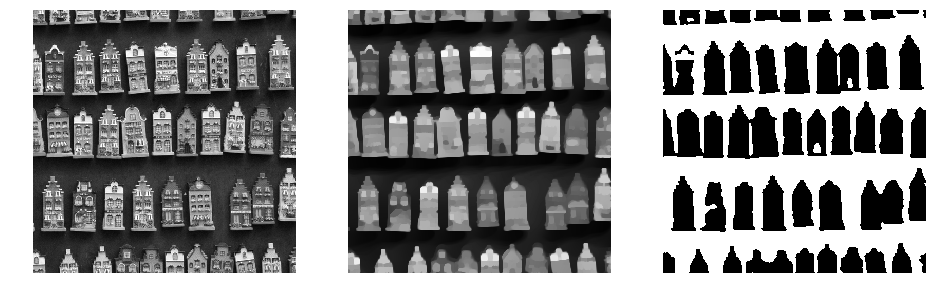

In [78]:
figure(figsize=(16, 8))
gray()
subplot(1, 3, 1)
imshow(im)
axis('off')
subplot(1, 3, 2)
imshow(U)
axis('off')
subplot(1, 3, 3)
imshow(binimage)
axis('off')
show()

In [79]:
from scipy.ndimage import filters

In [100]:
def cal_energy(oimg, bimg, lmd):
    imb = bimg.copy()
    imb = 1-imb
    
    imx = zeros(imb.shape)
    filters.sobel(imb, 1, imx)
    imy = zeros(imb.shape)
    filters.sobel(imb, 0, imy)
    im2 = sqrt(imx**2 + imy**2)

    E_edge = sum(im2)
    
    imb = 120.0*imb/255 + 40.0/255
    img = 1.0*oimg.copy()/255
    im3 = (img - imb)**2
    E_body = sum(im3)
    
#    figure()
#    subplot(1, 2, 1)
#    imshow(im2)
#    axis('off')
#    subplot(1, 2, 2)
#    imshow(im3)
#    axis('off')
#    show()
#    
#    print E_edge, E_body

    return 0.5*lmd*E_edge + E_body, E_edge, E_body

In [101]:
print cal_energy(im, binimage, 1)

(91763.289554841045, 75370.780232327234, 54077.899438677428)


t= 0.2 : E= 31137.6292246
Ee= 33940.8393281 , Eb= 22652.4193925
t= 0.25 : E= 27247.6595677
Ee= 57648.4965713 , Eb= 12835.5354248
t= 0.3 : E= 24504.0884836
Ee= 71393.5220391 , Eb= 6655.70797386
t= 0.35 : E= 24413.8613941
Ee= 75370.7802323 , Eb= 5571.16633602
t= 0.4 : E= 24454.2844625
Ee= 77271.4122985 , Eb= 5136.43138793
t= 0.45 : E= 25019.5589919
Ee= 80998.1177979 , Eb= 4770.02954248
t= 0.5 : E= 24891.2522846
Ee= 79578.7336442 , Eb= 4996.56887351
t= 0.55 : E= 25443.4659075
Ee= 78975.6185856 , Eb= 5699.56126105
t= 0.6 : E= 26669.1402989
Ee= 77162.8928527 , Eb= 7378.41708574
t= 0.65 : E= 27085.4658865
Ee= 64899.2706357 , Eb= 10860.6482276
t= 0.7 : E= 26700.0769714
Ee= 45707.3564978 , Eb= 15273.237847
t= 0.75 : E= 26239.0425054
Ee= 28341.2772267 , Eb= 19153.7231988
t= 0.8 : E= 25352.4219484
Ee= 14040.8166823 , Eb= 21842.2177778
best threshold =  0.35


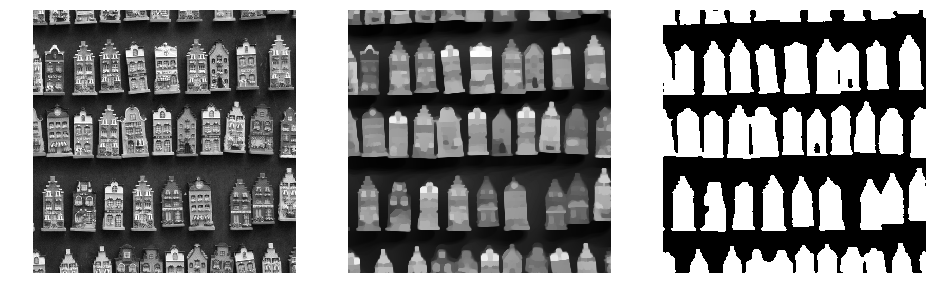

In [102]:
l = 0.5
E_min = 1e10
t_opt = -1
for t in arange(0.2, 0.8, 0.05):
    binimage = 1*(U < t*U.max())
    E, Ee, Eb = cal_energy(im, binimage, l)
    print 't=', t, ': E=', E
    print 'Ee=', Ee, ', Eb=', Eb
    if E<E_min:
        E_min = E
        t_opt = t

t = t_opt
binimage = 1*(U > t*U.max())
print 'best threshold = ', t_opt

figure(figsize=(16, 8))
gray()
subplot(1, 3, 1)
imshow(im)
axis('off')
subplot(1, 3, 2)
imshow(U)
axis('off')
subplot(1, 3, 3)
imshow(binimage)
axis('off')
show()

In [85]:
from pylab import *

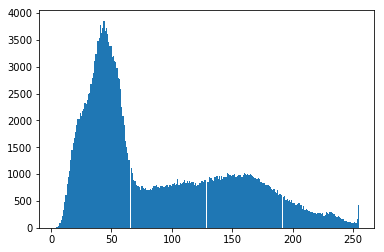

In [86]:
figure()
hist(im.flatten(), 256)
show()